# PROBLEMS

- How was the sales trend over the months?
- What are the most frequently purchased products?
- How many products does the customer purchase in each transaction?
- What are the most profitable segment customers?
- Based on your findings, what strategy could you recommend to the     business to gain more profit?

# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings. filterwarnings('ignore')

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()
cf.set_config_file(theme='space', sharing='public', offline=True)

# Data Loading 

In [2]:
data=pd.read_csv("Sales Data.csv")

In [3]:
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [4]:
data.tail()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany
536349,C536548,12/1/2018,22767,Triple Photo Frame Cornice,20.45,-2,12472.0,Germany


In [5]:
data.shape

(536350, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


# Additional info

- TransactionNo (categorical): A six-digit unique number that       defines each transaction. The letter "C" in the code indicates a   cancellation.


- Date(numeric): The date when each transaction was generated.


- ProductNo (categorical): A five or six-digit unique character   
  used to identify a specific product.


- Product (categorical): Product/Item name.


- Price (numeric): The price of each product per unit in pound       sterling.


- Quantity (numeric): The quantity of each product per               transaction. Negative values related to cancelled transactions.


- CustomerNo (categorical): A five-digit unique number that         defines each customer.


- Country (categorical): Name of the country where the customer     resides.

# Turn the Date column to DateTime type

In [7]:
data['Date']=pd.to_datetime(data['Date'])

In [8]:
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  536350 non-null  object        
 1   Date           536350 non-null  datetime64[ns]
 2   ProductNo      536350 non-null  object        
 3   ProductName    536350 non-null  object        
 4   Price          536350 non-null  float64       
 5   Quantity       536350 non-null  int64         
 6   CustomerNo     536295 non-null  float64       
 7   Country        536350 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.7+ MB


In [10]:
data.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


In [11]:
data.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [12]:
data[data['CustomerNo'].isnull()]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
6511,C581406,2019-12-08,46000M,Polyester Filler Pad 45x45cm,6.19,-240,NaN,United Kingdom
6512,C581406,2019-12-08,46000S,Polyester Filler Pad 40x40cm,6.19,-300,NaN,United Kingdom
90098,C575153,2019-11-08,22947,Wooden Advent Calendar Red,44.25,-1,NaN,United Kingdom
102671,C574288,2019-11-03,22178,Victorian Glass Hanging T-Light,25.37,-1,NaN,United Kingdom
117263,C573180,2019-10-28,23048,Set Of 10 Lanterns Fairy Light Star,14.50,-1,NaN,United Kingdom
163160,C569495,2019-10-04,21843,Red Retrospot Cake Stand,21.47,-1,NaN,United Kingdom
190598,C567518,2019-09-20,22846,Bread Bin Diner Style Red,27.62,-1,NaN,United Kingdom
192284,C567518,2019-09-20,21871,Save The Planet Mug,11.94,-12,NaN,United Kingdom
242406,C563015,2019-08-11,46000M,Polyester Filler Pad 45x45cm,10.25,-160,NaN,United Kingdom
242407,C563015,2019-08-11,46000S,Polyester Filler Pad 40x40cm,10.25,-220,NaN,United Kingdom


# Let's drop all null and duplicated values

In [13]:
data.dropna(inplace=True)
data.isnull().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

In [14]:
data.duplicated().sum()

5200

In [15]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

# Answering the Questions


# 1. How was the sales trend over the months?

In [16]:
data['Total']=data['Quantity']*data['Price']
data['Month_Year']=pd.to_datetime(data['Date']).dt.to_period('M')
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Total,Month_Year
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,2019-12
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,2019-12
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,2019-12
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,2019-12
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,2019-12


In [17]:
total_month=data.groupby(['Month_Year'],as_index=False)['Total'].sum()
total_month.columns=['Date','Total']
total_month.head()

,Date,Total
0,2018-12,4217281.53
1,2019-01,3638948.12
2,2019-02,3292324.69
3,2019-03,4340035.60
4,2019-04,3406002.17


In [18]:
total_month.iplot(x='Date',y='Total',title='Sales Trend Over The Months',
                 yTitle='Total Money',xTitle='Month',mode='lines+markers',size=6)

In [19]:
data_no_return=data[data['Quantity']>0]

number_of_sales=data_no_return.groupby(by='Month_Year',as_index=False)['Total'].count()

number_of_sales

,Month_Year,Total
0,2018-12,40899
1,2019-01,33860
2,2019-02,26759
3,2019-03,35318
4,2019-04,28707
5,2019-05,35756
6,2019-06,35533
7,2019-07,38138
8,2019-08,34092
9,2019-09,48635


In [20]:
number_of_sales.columns=['Date', 'Sum of Sales']
number_of_sales.iplot(x='Date',y='Sum of Sales',title='Number of Sales Each Month',
                     yTitle='Number of Sales',xTitle='Months',mode='lines+markers',
                     size=6)

In [21]:
data.sort_values('Date',ascending=False).head(5)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Total,Month_Year
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,2019-12
1076,581498,2019-12-09,21930,Jumbo Storage Bag Skulls,6.19,2,14498.0,United Kingdom,12.38,2019-12
1086,581498,2019-12-09,22041,"Record Frame 7"" Single Size",6.19,2,14498.0,United Kingdom,12.38,2019-12
1085,581498,2019-12-09,21989,Pack Of 20 Skull Paper Napkins,6.19,1,14498.0,United Kingdom,6.19,2019-12
1084,581498,2019-12-09,21987,Pack Of 6 Skull Paper Cups,6.19,2,14498.0,United Kingdom,12.38,2019-12


# Answer
We can see that from December 2018 to August 2019 there is no big change in total income or number of sales. But things are getting different from that point, maybe due to Christmas, we can see a rising trend on our charts. According to them, December 2019 was the worst month in sales and income, however, we can observe, that it is due to a lack of data. Our dataset is only up to 9th December, whereas all other months have full data. There is only info of 9 days in December 2019, but we already have more than half the number of sales than in December 2018 and almost half of income. So we can guess that December 2019 would have been richer in sales and income than a year ago.

# 2. What are the most frequently purchased products?

In [22]:
popular_products=data.groupby(by='ProductName',as_index=False)['Quantity'].sum()
popular_products=popular_products.sort_values('Quantity',ascending=False).head(10)

In [23]:
popular_products.iplot(kind='bar',x='ProductName',y='Quantity',title='10 Most Frequently Purchased Products')

# 3. How many products does the customer purchase in each transaction?

Let's see the top 10 quantity amount

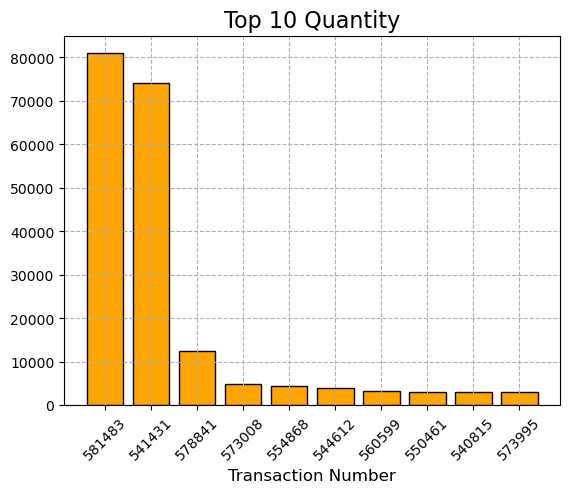

In [24]:
top_quantity = data.sort_values('Quantity', ascending=False)[['Quantity', 'TransactionNo']].head(10).reset_index(drop = True)

x=top_quantity['TransactionNo']
y=top_quantity['Quantity']

plt.bar(x,y,color='orange',ec="black")
plt.title("Top 10 Quantity",fontsize=16)
# plt.ylabel("Salary",fontsize=12)
plt.xlabel("Transaction Number",fontsize=12)
plt.xticks(fontsize=10,rotation=45)
plt.grid(True,linestyle='dashed')
plt.show()

I will calculate the mean of positive quantities, that will be my answer to question

In [25]:
round(data_no_return['Quantity'].mean())

11

# Answer
The average number of products bought per transaction is 11.

# 4. What are the most profitable segment customers?

Let me check which countries are the most and least profitable.

In [26]:
most_profitable_countries = data.groupby(by='Country', as_index = False)['Total'].sum().sort_values('Total', ascending = False).head(10)
least_profitable_countries = data.groupby(by='Country', as_index = False)['Total'].sum().sort_values('Total').head(10)

In [27]:
most_profitable_countries.iplot(kind='bar',x ='Country',y='Total',
                                title='Most Profitable Countries', yTitle='Income', colors='Green')
least_profitable_countries.iplot(kind='bar',x ='Country',y='Total',title='Least Profitable Countries',
                                 yTitle='Income', colors='Red')

# The most popular products in UK

In [28]:
popular_UK=data_no_return[data_no_return['Country']=='United Kingdom']
popular_UK1=popular_UK.groupby(by='ProductName',as_index=False)['Total'].count().head().sort_values('Total', ascending=False)
popular_UK1.iplot(kind='pie', labels='ProductName', values='Total', hole =.4, title='Most Popular Products in UK')

In [29]:
popular_UK_2=popular_UK.groupby(by='ProductName', as_index = False)['Total'].sum().head().sort_values('Total', ascending = False)
popular_UK_2.iplot(kind='pie', labels='ProductName', values='Total', hole =.4,title='Top High-Income Products in the UK')

# Let's see now which products are providing the highest income worlwide.

In [30]:
most_profitable_products = data.groupby(by='ProductName', as_index=False)['Total'].sum().sort_values('Total',
                                                                                                     ascending=False).head(10)
most_profitable_products.iplot(kind='bar', x='ProductName', title='Top 10 High Income Products Worldwide', yTitle='Income', colors='#FF8552')

# Answer
Most profitable segment customers are customers from countries included in 'Most Profitable Countries' (especially UK).

# 5. Based on your findings, what strategy could you recommend to the business to gain more profit?


We need a little more research

In [31]:
data_negative_quantity = data[data['Quantity'] < 0]
data_negative_quantity['Quantity']=abs(data_negative_quantity['Quantity'])
data_negative_quantity_1=data_negative_quantity.groupby(by='ProductName',
                                                        as_index=False)['Quantity'].sum().sort_values('Quantity',
                                                                                              ascending=False).head(10)

data_negative_quantity_1                                                                                                                                             

,ProductName,Quantity
1144,Paper Craft Little Birdie,80995
990,Medium Ceramic Top Storage Jar,74494
1409,Rotating Silver Angels T-Light Hldr,9367
566,Fairy Cake Flannel Assorted Colour,3150
414,Cream Hanging Heart T-Light Holder,2578
685,Gin And Tonic Diet Metal Sign,2030
801,Herb Marker Basil,1527
592,Feltcraft Doll Molly,1447
1694,Tea Time Party Bunting,1424
1148,Paper Pocket Traveling Fan,1385


In [32]:
data_negative_quantity_1.iplot(kind='bar',x='ProductName', y='Quantity',title='Top Canceled Products', colors='#FF5A5F')

In [34]:
data_negative_quantity_2=data_negative_quantity.groupby(by='Country',
                                                        as_index=False)['Quantity'].sum().sort_values('Quantity',
                                                                                                      ascending=False).head(10)
data_negative_quantity_2.iplot(kind='bar', x='Country', y='Quantity',
                               title='Countries With Most Canceled Transactions', colors='#A6808C')

# Answer
1. The company needs to improve shipping or advertising more to     other countries than the UK.


2. I would suggest checking on the first two products on 'Top       Canceled Products'. The company lost 150k orders because of       these two products' order cancelation.


3. Advertising best-selling products in other countries than the      UK.


4. Increasing the ads budget a couple months before Christmas may    be a good idea.